In [1]:
import torch
import torchvision
import torch.nn as nn
import math
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

In [2]:
# !cp ./working/audio-images/test_class_0/*  ./working/audio-images/class_0
# !cp ./working/audio-images/test_class_1/*  ./working/audio-images/class_1

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
num_epochs = 300
sz = (256, 192)
learning_rate = 0.005
batch_size = 32
device = 'cuda'

In [5]:
class CapDataset(Dataset):
    def __init__(self, annotation_file):
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transforms.Compose([None])

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_vec = torch.tensor(self.annotations.iloc[index, 1:], dtype=torch.float)
        img = torch.reshape(img_vec,(1, sz[1], sz[0]))
        # img = torch.transpose(img,1,2)

        y_label = torch.tensor(self.annotations.iloc[index, 0],dtype=torch.long)
        # if (y_label <= 61 ):
        #     img = torch.transpose(img,1,2)

        return (img, y_label)

In [6]:
# !unzip /content/drive/MyDrive/working.zip

In [7]:
import cv2
import numpy as np
import pandas as pd
import os

df = pd.DataFrame()
smt = False

image_folder = './class_0/'
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        # Load and convert the image to grayscale
        # image_path = '/content/working/audio-images/class_0/1000_index.png'
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image, sz)
        # print(gray_image.shape)
        if not smt:
            cv2.imshow("img", gray_image)
            cv2.waitKey(0)
            smt = True
        # Reshape the grayscale image array
        gray_array_reshaped = gray_image.reshape(-1)
        gray_array_reshaped = np.insert(gray_array_reshaped, 0, 0)

        # Create a DataFrame with pixel columns
        dfl = pd.DataFrame(gray_array_reshaped.reshape(-1, len(gray_array_reshaped)))
        df = pd.concat([df, dfl], ignore_index=True)

image_folder = './class_1/'
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        # Load and convert the image to grayscale
        # image_path = '/content/working/audio-images/class_0/1000_index.png'
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image, sz)
        # print(gray_image.shape)

        # Reshape the grayscale image array
        gray_array_reshaped = gray_image.reshape(-1)
        gray_array_reshaped = np.insert(gray_array_reshaped, 0, 1)

        # Create a DataFrame with pixel columns
        dfl = pd.DataFrame(gray_array_reshaped.reshape(-1, len(gray_array_reshaped)))
        df = pd.concat([df, dfl], ignore_index=True)

# Print the first few rows of the DataFrame
print(df.head())
df.to_csv('output_train_large.csv', header=False, index=False)

df = pd.DataFrame()

image_folder = './test_class_0/'
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        # Load and convert the image to grayscale
        # image_path = '/content/working/audio-images/class_0/1000_index.png'
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image, sz)
        # print(gray_image.shape)

        # Reshape the grayscale image array
        gray_array_reshaped = gray_image.reshape(-1)
        gray_array_reshaped = np.insert(gray_array_reshaped, 0, 0)

        # Create a DataFrame with pixel columns
        dfl = pd.DataFrame(gray_array_reshaped.reshape(-1, len(gray_array_reshaped)))
        df = pd.concat([df, dfl], ignore_index=True)

image_folder = './test_class_1/'
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)
        # Load and convert the image to grayscale
        # image_path = '/content/working/audio-images/class_0/1000_index.png'
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image, sz)
        # print(gray_image.shape)

        # Reshape the grayscale image array
        gray_array_reshaped = gray_image.reshape(-1)
        gray_array_reshaped = np.insert(gray_array_reshaped, 0, 1)

        # Create a DataFrame with pixel columns
        dfl = pd.DataFrame(gray_array_reshaped.reshape(-1, len(gray_array_reshaped)))
        df = pd.concat([df, dfl], ignore_index=True)

# Print the first few rows of the DataFrame
print(df.head())
df.to_csv('output_test_large.csv', header=False, index=False)


In [8]:
df = pd.read_csv("output_train.csv")
num_samples = df.shape[0]
df.shape

In [9]:
dataset = CapDataset("output_train_large.csv")
dataset_test = CapDataset("output_test_large.csv")
print(len(dataset))
# train_set, validation_set = torch.utils.data.random_split(dataset,[((int)(0.9*num_samples)),num_samples - ((int)(0.9*num_samples))])
train_loader = DataLoader(dataset=dataset, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(dataset=dataset_test, shuffle=True, batch_size=batch_size)

2656


C:\Users\Asus\AppData\Local\Temp\ipykernel_7572\43906973.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_vec = torch.tensor(self.annotations.iloc[index, 1:], dtype=torch.float)
C:\Users\Asus\AppData\Local\Temp\ipykernel_7572\1362613775.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Temp\ipykernel_7572\1362613775.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


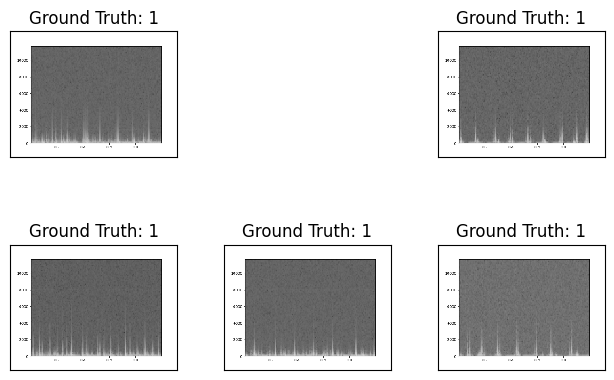

In [10]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [11]:
Half_width = 128
layer_width = 128


class SpinalVGG(nn.Module):

    def two_conv_pool(self, in_channels, f1, f2):
        s = nn.Sequential(
            nn.Conv2d(in_channels, f1, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f1),
            nn.ReLU(inplace=True),
            nn.Conv2d(f1, f2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        for m in s.children():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
        return s

    def three_conv_pool(self, in_channels, f1, f2, f3):
        s = nn.Sequential(
            nn.Conv2d(in_channels, f1, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f1),
            nn.ReLU(inplace=True),
            nn.Conv2d(f1, f2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f2),
            nn.ReLU(inplace=True),
            nn.Conv2d(f2, f3, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(f3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        for m in s.children():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
        return s

    def __init__(self, num_classes=2):
        super(SpinalVGG, self).__init__()
        self.l1 = self.two_conv_pool(1, 64, 64)
        self.l2 = self.two_conv_pool(64, 128, 128)
        self.l3 = self.three_conv_pool(128, 256, 256, 256)
        self.l4 = self.three_conv_pool(256, 256, 256, 256)

        self.fc_spinal_layer1 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(Half_width, layer_width),
            nn.BatchNorm1d(layer_width), nn.ReLU(inplace=True),)
        self.fc_spinal_layer2 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(Half_width+layer_width, layer_width),
            nn.BatchNorm1d(layer_width), nn.ReLU(inplace=True),)
        self.fc_spinal_layer3 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(Half_width+layer_width, layer_width),
            nn.BatchNorm1d(layer_width), nn.ReLU(inplace=True),)
        self.fc_spinal_layer4 = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(Half_width+layer_width, layer_width),
            nn.BatchNorm1d(layer_width), nn.ReLU(inplace=True),)
        self.fc_out = nn.Sequential(
            nn.Dropout(p=0.5), nn.Linear(layer_width*4, num_classes),)

    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        x = x.view(x.size(0), -1)

        x1 = self.fc_spinal_layer1(x[:, 0:Half_width])
        x2 = self.fc_spinal_layer2(
            torch.cat([x[:, Half_width:2*Half_width], x1], dim=1))
        x3 = self.fc_spinal_layer3(torch.cat([x[:, 0:Half_width], x2], dim=1))
        x4 = self.fc_spinal_layer4(
            torch.cat([x[:, Half_width:2*Half_width], x3], dim=1))

        x = torch.cat([x1, x2], dim=1)
        x = torch.cat([x, x3], dim=1)
        x = torch.cat([x, x4], dim=1)

        x = self.fc_out(x)

        return F.log_softmax(x, dim=1)


In [12]:
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr1 = learning_rate

In [13]:
model1 = SpinalVGG().to(device)
# model1.load_state_dict(torch.load("WEIGHT\\model.h5"))

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

In [15]:
from tqdm import tqdm

In [16]:
total_step = len(train_loader)
best_accuracy1 = 0
epochs = []
vals = []

tp = tn = fp = fn = 0

for epoch in tqdm(range(num_epochs)):
    epochs.append(epoch)
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model1(images)
        loss1 = criterion(outputs, labels)

        # Backward and optimize
        optimizer1.zero_grad()
        loss1.backward()
        optimizer1.step()

        if i % 1000 == 0:
            print ("Ordinary Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss1.item()))

    model1.eval()
    with torch.no_grad():
        correct1 = 0
        total1 = 0

        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)


            outputs = model1(images)
            _, predicted = torch.max(outputs.data, 1)
            total1 += labels.size(0)
            correct1 += (predicted == labels).sum().item()
            tp += ((predicted == 1) & (labels == 1)).sum().item()
            tn += ((predicted == 0) & (labels == 0)).sum().item()
            fp += ((predicted == 1) & (labels == 0)).sum().item()
            fn += ((predicted == 0) & (labels == 1)).sum().item()

        if best_accuracy1>= correct1 / total1:
            curr_lr1 = learning_rate*np.ndarray.item(pow(np.random.rand(1),3))
            update_lr(optimizer1, curr_lr1)
            print('Test Accuracy of NN: {} % Best: {} %'.format(100 * correct1 / total1, 100*best_accuracy1))
            vals.append(100 * best_accuracy1)
        else:
            best_accuracy1 = correct1 / total1
            net_opt1 = model1
            print('Test Accuracy of NN: {} % (improvement)'.format(100 * correct1 / total1))
            vals.append(best_accuracy1)
            torch.save(model1.state_dict(), "model_large_rect_optimal.h5")

        torch.save(model1.state_dict(), "model_large_final.h5")

        model1.train()


  0%|          | 0/300 [00:00<?, ?it/s]C:\Users\Asus\AppData\Local\Temp\ipykernel_7572\43906973.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_vec = torch.tensor(self.annotations.iloc[index, 1:], dtype=torch.float)


Ordinary Epoch [1/300], Step [1/83] Loss: 0.8319


83it [00:44,  1.88it/s]
  0%|          | 1/300 [00:53<4:28:24, 53.86s/it]

Test Accuracy of NN: 53.31325301204819 % (improvement)


Ordinary Epoch [2/300], Step [1/83] Loss: 0.5420


83it [00:44,  1.86it/s]
  1%|          | 2/300 [01:49<4:31:47, 54.72s/it]

Test Accuracy of NN: 53.91566265060241 % (improvement)


Ordinary Epoch [3/300], Step [1/83] Loss: 0.8001


83it [00:48,  1.73it/s]
  1%|          | 3/300 [02:48<4:41:33, 56.88s/it]

Test Accuracy of NN: 62.80120481927711 % (improvement)


Ordinary Epoch [4/300], Step [1/83] Loss: 0.5778


83it [00:56,  1.48it/s]
  1%|▏         | 4/300 [03:55<5:00:53, 60.99s/it]

Test Accuracy of NN: 57.53012048192771 % Best: 62.80120481927711 %


Ordinary Epoch [5/300], Step [1/83] Loss: 0.5744


83it [00:45,  1.84it/s]
  2%|▏         | 5/300 [04:52<4:51:26, 59.27s/it]

Test Accuracy of NN: 86.89759036144578 % (improvement)


Ordinary Epoch [6/300], Step [1/83] Loss: 0.3555


83it [00:44,  1.87it/s]
  2%|▏         | 6/300 [05:47<4:44:02, 57.97s/it]

Test Accuracy of NN: 85.5421686746988 % Best: 86.8975903614458 %


Ordinary Epoch [7/300], Step [1/83] Loss: 0.5304


83it [00:46,  1.77it/s]
  2%|▏         | 7/300 [06:48<4:47:22, 58.85s/it]

Test Accuracy of NN: 88.855421686747 % (improvement)


Ordinary Epoch [8/300], Step [1/83] Loss: 0.2527


83it [00:46,  1.78it/s]
  3%|▎         | 8/300 [07:46<4:44:49, 58.53s/it]

Test Accuracy of NN: 70.48192771084338 % Best: 88.85542168674698 %


Ordinary Epoch [9/300], Step [1/83] Loss: 0.2899


83it [00:44,  1.87it/s]
  3%|▎         | 9/300 [08:41<4:39:24, 57.61s/it]

Test Accuracy of NN: 87.8012048192771 % Best: 88.85542168674698 %


Ordinary Epoch [10/300], Step [1/83] Loss: 0.3741


83it [00:49,  1.67it/s]
  3%|▎         | 10/300 [09:42<4:42:57, 58.54s/it]

Test Accuracy of NN: 53.31325301204819 % Best: 88.85542168674698 %


Ordinary Epoch [11/300], Step [1/83] Loss: 0.5470


83it [00:44,  1.87it/s]
  4%|▎         | 11/300 [10:39<4:40:00, 58.13s/it]

Test Accuracy of NN: 74.39759036144578 % Best: 88.85542168674698 %


Ordinary Epoch [12/300], Step [1/83] Loss: 0.5196


83it [00:46,  1.78it/s]
  4%|▍         | 12/300 [11:38<4:40:39, 58.47s/it]

Test Accuracy of NN: 83.13253012048193 % Best: 88.85542168674698 %


Ordinary Epoch [13/300], Step [1/83] Loss: 0.2936


83it [00:46,  1.80it/s]
  4%|▍         | 13/300 [12:36<4:38:20, 58.19s/it]

Test Accuracy of NN: 90.66265060240964 % (improvement)


Ordinary Epoch [14/300], Step [1/83] Loss: 0.1821


83it [00:45,  1.83it/s]
  5%|▍         | 14/300 [13:32<4:35:02, 57.70s/it]

Test Accuracy of NN: 53.16265060240964 % Best: 90.66265060240963 %


Ordinary Epoch [15/300], Step [1/83] Loss: 0.4481


83it [00:43,  1.89it/s]
  5%|▌         | 15/300 [14:28<4:30:26, 56.93s/it]

Test Accuracy of NN: 57.68072289156626 % Best: 90.66265060240963 %


Ordinary Epoch [16/300], Step [1/83] Loss: 0.2759


83it [00:46,  1.78it/s]
  5%|▌         | 16/300 [15:28<4:34:08, 57.92s/it]

Test Accuracy of NN: 91.56626506024097 % (improvement)


Ordinary Epoch [17/300], Step [1/83] Loss: 0.1799


83it [00:49,  1.69it/s]
  6%|▌         | 17/300 [16:29<4:38:03, 58.95s/it]

Test Accuracy of NN: 85.24096385542168 % Best: 91.56626506024097 %


Ordinary Epoch [18/300], Step [1/83] Loss: 0.1732


83it [00:48,  1.72it/s]
  6%|▌         | 18/300 [17:30<4:39:35, 59.49s/it]

Test Accuracy of NN: 83.58433734939759 % Best: 91.56626506024097 %


Ordinary Epoch [19/300], Step [1/83] Loss: 0.3423


83it [00:50,  1.65it/s]
  6%|▋         | 19/300 [18:32<4:42:55, 60.41s/it]

Test Accuracy of NN: 50.75301204819277 % Best: 91.56626506024097 %


Ordinary Epoch [20/300], Step [1/83] Loss: 0.4260


83it [00:48,  1.73it/s]
  7%|▋         | 20/300 [19:33<4:41:41, 60.36s/it]

Test Accuracy of NN: 92.62048192771084 % (improvement)


Ordinary Epoch [21/300], Step [1/83] Loss: 0.1562


83it [00:50,  1.64it/s]
  7%|▋         | 21/300 [20:35<4:43:50, 61.04s/it]

Test Accuracy of NN: 50.45180722891566 % Best: 92.62048192771084 %


Ordinary Epoch [22/300], Step [1/83] Loss: 0.2578


83it [00:47,  1.75it/s]
  7%|▋         | 22/300 [21:35<4:40:20, 60.50s/it]

Test Accuracy of NN: 92.31927710843374 % Best: 92.62048192771084 %


Ordinary Epoch [23/300], Step [1/83] Loss: 0.2746


83it [00:51,  1.63it/s]
  8%|▊         | 23/300 [22:38<4:43:31, 61.41s/it]

Test Accuracy of NN: 83.8855421686747 % Best: 92.62048192771084 %


Ordinary Epoch [24/300], Step [1/83] Loss: 0.2357


83it [00:52,  1.59it/s]
  8%|▊         | 24/300 [23:43<4:47:35, 62.52s/it]

Test Accuracy of NN: 92.62048192771084 % Best: 92.62048192771084 %


Ordinary Epoch [25/300], Step [1/83] Loss: 0.1321


83it [00:48,  1.71it/s]
  8%|▊         | 25/300 [24:44<4:43:41, 61.89s/it]

Test Accuracy of NN: 63.704819277108435 % Best: 92.62048192771084 %


Ordinary Epoch [26/300], Step [1/83] Loss: 0.2940


83it [00:50,  1.65it/s]
  9%|▊         | 26/300 [25:47<4:44:50, 62.37s/it]

Test Accuracy of NN: 93.07228915662651 % (improvement)


Ordinary Epoch [27/300], Step [1/83] Loss: 0.1327


83it [00:49,  1.69it/s]
  9%|▉         | 27/300 [26:48<4:42:00, 61.98s/it]

Test Accuracy of NN: 72.28915662650603 % Best: 93.07228915662651 %


Ordinary Epoch [28/300], Step [1/83] Loss: 0.2903


83it [00:49,  1.68it/s]
  9%|▉         | 28/300 [27:49<4:40:04, 61.78s/it]

Test Accuracy of NN: 93.82530120481928 % (improvement)


Ordinary Epoch [29/300], Step [1/83] Loss: 0.1281


83it [00:49,  1.69it/s]
 10%|▉         | 29/300 [28:51<4:38:04, 61.57s/it]

Test Accuracy of NN: 64.60843373493977 % Best: 93.82530120481928 %


Ordinary Epoch [30/300], Step [1/83] Loss: 0.4200


83it [00:49,  1.66it/s]
 10%|█         | 30/300 [29:52<4:37:15, 61.61s/it]

Test Accuracy of NN: 94.12650602409639 % (improvement)


Ordinary Epoch [31/300], Step [1/83] Loss: 0.2062


83it [00:46,  1.79it/s]
 10%|█         | 31/300 [30:51<4:31:53, 60.65s/it]

Test Accuracy of NN: 94.42771084337349 % (improvement)


Ordinary Epoch [32/300], Step [1/83] Loss: 0.3533


83it [00:47,  1.74it/s]
 11%|█         | 32/300 [31:50<4:29:32, 60.34s/it]

Test Accuracy of NN: 93.07228915662651 % Best: 94.42771084337349 %


Ordinary Epoch [33/300], Step [1/83] Loss: 0.1560


83it [00:49,  1.67it/s]
 11%|█         | 33/300 [32:52<4:29:45, 60.62s/it]

Test Accuracy of NN: 88.25301204819277 % Best: 94.42771084337349 %


Ordinary Epoch [34/300], Step [1/83] Loss: 0.2889


83it [00:49,  1.69it/s]
 11%|█▏        | 34/300 [33:54<4:30:32, 61.02s/it]

Test Accuracy of NN: 47.89156626506024 % Best: 94.42771084337349 %


Ordinary Epoch [35/300], Step [1/83] Loss: 0.1786


83it [00:50,  1.63it/s]
 12%|█▏        | 35/300 [34:57<4:33:05, 61.83s/it]

Test Accuracy of NN: 93.97590361445783 % Best: 94.42771084337349 %


Ordinary Epoch [36/300], Step [1/83] Loss: 0.2393


83it [00:51,  1.61it/s]
 12%|█▏        | 36/300 [36:02<4:35:42, 62.66s/it]

Test Accuracy of NN: 94.27710843373494 % Best: 94.42771084337349 %


Ordinary Epoch [37/300], Step [1/83] Loss: 0.4746


83it [00:52,  1.59it/s]
 12%|█▏        | 37/300 [37:07<4:37:56, 63.41s/it]

Test Accuracy of NN: 59.33734939759036 % Best: 94.42771084337349 %


Ordinary Epoch [38/300], Step [1/83] Loss: 0.1289


83it [00:50,  1.64it/s]
 13%|█▎        | 38/300 [38:09<4:35:27, 63.08s/it]

Test Accuracy of NN: 93.07228915662651 % Best: 94.42771084337349 %


Ordinary Epoch [39/300], Step [1/83] Loss: 0.1185


83it [00:52,  1.58it/s]
 13%|█▎        | 39/300 [39:13<4:35:28, 63.33s/it]

Test Accuracy of NN: 47.28915662650602 % Best: 94.42771084337349 %


Ordinary Epoch [40/300], Step [1/83] Loss: 0.1713


83it [00:43,  1.89it/s]
 13%|█▎        | 40/300 [40:08<4:23:20, 60.77s/it]

Test Accuracy of NN: 95.18072289156626 % (improvement)


Ordinary Epoch [41/300], Step [1/83] Loss: 0.3859


83it [00:43,  1.91it/s]
 14%|█▎        | 41/300 [41:02<4:14:00, 58.84s/it]

Test Accuracy of NN: 94.12650602409639 % Best: 95.18072289156626 %


Ordinary Epoch [42/300], Step [1/83] Loss: 0.1160


83it [00:43,  1.92it/s]
 14%|█▍        | 42/300 [41:56<4:06:36, 57.35s/it]

Test Accuracy of NN: 94.57831325301204 % Best: 95.18072289156626 %


Ordinary Epoch [43/300], Step [1/83] Loss: 0.3262


83it [00:42,  1.93it/s]
 14%|█▍        | 43/300 [42:50<4:01:16, 56.33s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 95.18072289156626 %


Ordinary Epoch [44/300], Step [1/83] Loss: 0.1119


83it [00:43,  1.92it/s]
 15%|█▍        | 44/300 [43:44<3:57:23, 55.64s/it]

Test Accuracy of NN: 94.27710843373494 % Best: 95.18072289156626 %


Ordinary Epoch [45/300], Step [1/83] Loss: 0.4479


83it [00:43,  1.93it/s]
 15%|█▌        | 45/300 [44:38<3:54:20, 55.14s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 95.18072289156626 %


Ordinary Epoch [46/300], Step [1/83] Loss: 0.2292


83it [00:43,  1.92it/s]
 15%|█▌        | 46/300 [45:33<3:52:28, 54.92s/it]

Test Accuracy of NN: 57.68072289156626 % Best: 95.18072289156626 %


Ordinary Epoch [47/300], Step [1/83] Loss: 0.1757


83it [00:43,  1.93it/s]
 16%|█▌        | 47/300 [46:27<3:50:45, 54.72s/it]

Test Accuracy of NN: 92.01807228915662 % Best: 95.18072289156626 %


Ordinary Epoch [48/300], Step [1/83] Loss: 0.1740


83it [00:43,  1.92it/s]
 16%|█▌        | 48/300 [47:21<3:49:17, 54.59s/it]

Test Accuracy of NN: 91.41566265060241 % Best: 95.18072289156626 %


Ordinary Epoch [49/300], Step [1/83] Loss: 0.0992


83it [00:42,  1.93it/s]
 16%|█▋        | 49/300 [48:15<3:47:28, 54.38s/it]

Test Accuracy of NN: 50.75301204819277 % Best: 95.18072289156626 %


Ordinary Epoch [50/300], Step [1/83] Loss: 0.1337


83it [00:43,  1.92it/s]
 17%|█▋        | 50/300 [49:09<3:46:14, 54.30s/it]

Test Accuracy of NN: 94.12650602409639 % Best: 95.18072289156626 %


Ordinary Epoch [51/300], Step [1/83] Loss: 0.1162


83it [00:43,  1.92it/s]
 17%|█▋        | 51/300 [50:03<3:44:52, 54.19s/it]

Test Accuracy of NN: 61.897590361445786 % Best: 95.18072289156626 %


Ordinary Epoch [52/300], Step [1/83] Loss: 0.1934


83it [00:43,  1.91it/s]
 17%|█▋        | 52/300 [50:57<3:44:12, 54.24s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 95.18072289156626 %


Ordinary Epoch [53/300], Step [1/83] Loss: 0.3097


83it [00:43,  1.90it/s]
 18%|█▊        | 53/300 [51:52<3:43:56, 54.40s/it]

Test Accuracy of NN: 92.46987951807229 % Best: 95.18072289156626 %


Ordinary Epoch [54/300], Step [1/83] Loss: 0.2537


83it [00:43,  1.93it/s]
 18%|█▊        | 54/300 [52:46<3:42:23, 54.24s/it]

Test Accuracy of NN: 93.07228915662651 % Best: 95.18072289156626 %


Ordinary Epoch [55/300], Step [1/83] Loss: 0.0917


83it [00:42,  1.93it/s]
 18%|█▊        | 55/300 [53:40<3:40:59, 54.12s/it]

Test Accuracy of NN: 93.07228915662651 % Best: 95.18072289156626 %


Ordinary Epoch [56/300], Step [1/83] Loss: 0.1372


83it [00:43,  1.93it/s]
 19%|█▊        | 56/300 [54:34<3:39:53, 54.07s/it]

Test Accuracy of NN: 92.16867469879519 % Best: 95.18072289156626 %


Ordinary Epoch [57/300], Step [1/83] Loss: 0.2083


83it [00:43,  1.93it/s]
 19%|█▉        | 57/300 [55:28<3:38:39, 53.99s/it]

Test Accuracy of NN: 92.7710843373494 % Best: 95.18072289156626 %


Ordinary Epoch [58/300], Step [1/83] Loss: 0.2882


83it [00:42,  1.93it/s]
 19%|█▉        | 58/300 [56:21<3:37:15, 53.86s/it]

Test Accuracy of NN: 94.12650602409639 % Best: 95.18072289156626 %


Ordinary Epoch [59/300], Step [1/83] Loss: 0.2052


83it [00:42,  1.94it/s]
 20%|█▉        | 59/300 [57:15<3:36:16, 53.84s/it]

Test Accuracy of NN: 93.97590361445783 % Best: 95.18072289156626 %


Ordinary Epoch [60/300], Step [1/83] Loss: 0.2165


83it [00:43,  1.93it/s]
 20%|██        | 60/300 [58:09<3:35:30, 53.88s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 95.18072289156626 %


Ordinary Epoch [61/300], Step [1/83] Loss: 0.5229


83it [00:42,  1.94it/s]
 20%|██        | 61/300 [59:03<3:34:15, 53.79s/it]

Test Accuracy of NN: 92.01807228915662 % Best: 95.18072289156626 %


Ordinary Epoch [62/300], Step [1/83] Loss: 0.1597


83it [00:42,  1.93it/s]
 21%|██        | 62/300 [59:56<3:33:17, 53.77s/it]

Test Accuracy of NN: 75.0 % Best: 95.18072289156626 %


Ordinary Epoch [63/300], Step [1/83] Loss: 0.2092


83it [00:42,  1.93it/s]
 21%|██        | 63/300 [1:00:52<3:35:08, 54.47s/it]

Test Accuracy of NN: 93.07228915662651 % Best: 95.18072289156626 %


Ordinary Epoch [64/300], Step [1/83] Loss: 0.1614


83it [00:45,  1.80it/s]
 21%|██▏       | 64/300 [1:01:50<3:37:29, 55.29s/it]

Test Accuracy of NN: 85.5421686746988 % Best: 95.18072289156626 %


Ordinary Epoch [65/300], Step [1/83] Loss: 0.4184


83it [00:45,  1.84it/s]
 22%|██▏       | 65/300 [1:02:46<3:37:42, 55.59s/it]

Test Accuracy of NN: 73.644578313253 % Best: 95.18072289156626 %


Ordinary Epoch [66/300], Step [1/83] Loss: 0.3166


83it [00:44,  1.85it/s]
 22%|██▏       | 66/300 [1:03:42<3:37:22, 55.74s/it]

Test Accuracy of NN: 91.41566265060241 % Best: 95.18072289156626 %


Ordinary Epoch [67/300], Step [1/83] Loss: 0.4442


83it [00:44,  1.85it/s]
 22%|██▏       | 67/300 [1:04:38<3:36:47, 55.83s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 95.18072289156626 %


Ordinary Epoch [68/300], Step [1/83] Loss: 0.2266


83it [00:44,  1.85it/s]
 23%|██▎       | 68/300 [1:05:34<3:36:09, 55.90s/it]

Test Accuracy of NN: 56.475903614457835 % Best: 95.18072289156626 %


Ordinary Epoch [69/300], Step [1/83] Loss: 0.1931


83it [00:44,  1.85it/s]
 23%|██▎       | 69/300 [1:06:30<3:35:22, 55.94s/it]

Test Accuracy of NN: 49.24698795180723 % Best: 95.18072289156626 %


Ordinary Epoch [70/300], Step [1/83] Loss: 0.1653


83it [00:44,  1.86it/s]
 23%|██▎       | 70/300 [1:07:26<3:34:17, 55.90s/it]

Test Accuracy of NN: 68.07228915662651 % Best: 95.18072289156626 %


Ordinary Epoch [71/300], Step [1/83] Loss: 0.1628


83it [00:44,  1.87it/s]
 24%|██▎       | 71/300 [1:08:22<3:33:18, 55.89s/it]

Test Accuracy of NN: 65.66265060240964 % Best: 95.18072289156626 %


Ordinary Epoch [72/300], Step [1/83] Loss: 0.1219


83it [00:45,  1.83it/s]
 24%|██▍       | 72/300 [1:09:18<3:33:10, 56.10s/it]

Test Accuracy of NN: 74.54819277108433 % Best: 95.18072289156626 %


Ordinary Epoch [73/300], Step [1/83] Loss: 0.0677


83it [00:45,  1.84it/s]
 24%|██▍       | 73/300 [1:10:15<3:32:45, 56.24s/it]

Test Accuracy of NN: 94.57831325301204 % Best: 95.18072289156626 %


Ordinary Epoch [74/300], Step [1/83] Loss: 0.0781


83it [00:44,  1.86it/s]
 25%|██▍       | 74/300 [1:11:11<3:31:31, 56.16s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 95.18072289156626 %


Ordinary Epoch [75/300], Step [1/83] Loss: 0.1173


83it [00:44,  1.85it/s]
 25%|██▌       | 75/300 [1:12:07<3:30:23, 56.10s/it]

Test Accuracy of NN: 90.21084337349397 % Best: 95.18072289156626 %


Ordinary Epoch [76/300], Step [1/83] Loss: 0.0776


83it [00:45,  1.84it/s]
 25%|██▌       | 76/300 [1:13:03<3:29:40, 56.16s/it]

Test Accuracy of NN: 95.78313253012048 % (improvement)


Ordinary Epoch [77/300], Step [1/83] Loss: 0.1053


83it [00:44,  1.85it/s]
 26%|██▌       | 77/300 [1:13:59<3:28:28, 56.09s/it]

Test Accuracy of NN: 91.26506024096386 % Best: 95.78313253012048 %


Ordinary Epoch [78/300], Step [1/83] Loss: 0.2130


83it [00:45,  1.84it/s]
 26%|██▌       | 78/300 [1:14:55<3:27:44, 56.15s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 95.78313253012048 %


Ordinary Epoch [79/300], Step [1/83] Loss: 0.1494


83it [00:44,  1.88it/s]
 26%|██▋       | 79/300 [1:15:51<3:25:53, 55.90s/it]

Test Accuracy of NN: 53.6144578313253 % Best: 95.78313253012048 %


Ordinary Epoch [80/300], Step [1/83] Loss: 0.1557


83it [00:45,  1.84it/s]
 27%|██▋       | 80/300 [1:16:47<3:25:34, 56.07s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 95.78313253012048 %


Ordinary Epoch [81/300], Step [1/83] Loss: 0.1516


83it [00:44,  1.86it/s]
 27%|██▋       | 81/300 [1:17:43<3:24:27, 56.02s/it]

Test Accuracy of NN: 88.855421686747 % Best: 95.78313253012048 %


Ordinary Epoch [82/300], Step [1/83] Loss: 0.3186


83it [00:44,  1.85it/s]
 27%|██▋       | 82/300 [1:18:39<3:23:47, 56.09s/it]

Test Accuracy of NN: 79.21686746987952 % Best: 95.78313253012048 %


Ordinary Epoch [83/300], Step [1/83] Loss: 0.0695


83it [00:44,  1.85it/s]
 28%|██▊       | 83/300 [1:19:36<3:23:03, 56.15s/it]

Test Accuracy of NN: 46.83734939759036 % Best: 95.78313253012048 %


Ordinary Epoch [84/300], Step [1/83] Loss: 0.1292


83it [00:44,  1.85it/s]
 28%|██▊       | 84/300 [1:20:32<3:22:12, 56.17s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 95.78313253012048 %


Ordinary Epoch [85/300], Step [1/83] Loss: 0.0962


83it [00:44,  1.86it/s]
 28%|██▊       | 85/300 [1:21:28<3:21:02, 56.10s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 95.78313253012048 %


Ordinary Epoch [86/300], Step [1/83] Loss: 0.1783


83it [00:45,  1.84it/s]
 29%|██▊       | 86/300 [1:22:24<3:20:29, 56.21s/it]

Test Accuracy of NN: 89.75903614457832 % Best: 95.78313253012048 %


Ordinary Epoch [87/300], Step [1/83] Loss: 0.1976


83it [00:44,  1.87it/s]
 29%|██▉       | 87/300 [1:23:20<3:18:59, 56.05s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 95.78313253012048 %


Ordinary Epoch [88/300], Step [1/83] Loss: 0.0800


83it [00:44,  1.86it/s]
 29%|██▉       | 88/300 [1:24:16<3:17:53, 56.01s/it]

Test Accuracy of NN: 90.96385542168674 % Best: 95.78313253012048 %


Ordinary Epoch [89/300], Step [1/83] Loss: 0.0818


83it [00:44,  1.86it/s]
 30%|██▉       | 89/300 [1:25:12<3:16:48, 55.96s/it]

Test Accuracy of NN: 79.21686746987952 % Best: 95.78313253012048 %


Ordinary Epoch [90/300], Step [1/83] Loss: 0.2261


83it [00:44,  1.85it/s]
 30%|███       | 90/300 [1:26:08<3:16:12, 56.06s/it]

Test Accuracy of NN: 90.06024096385542 % Best: 95.78313253012048 %


Ordinary Epoch [91/300], Step [1/83] Loss: 0.1135


83it [00:44,  1.86it/s]
 30%|███       | 91/300 [1:27:04<3:15:03, 56.00s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 95.78313253012048 %


Ordinary Epoch [92/300], Step [1/83] Loss: 0.0890


83it [00:44,  1.85it/s]
 31%|███       | 92/300 [1:28:00<3:14:17, 56.05s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 95.78313253012048 %


Ordinary Epoch [93/300], Step [1/83] Loss: 0.0802


83it [00:49,  1.67it/s]
 31%|███       | 93/300 [1:29:01<3:18:24, 57.51s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 95.78313253012048 %


Ordinary Epoch [94/300], Step [1/83] Loss: 0.0766


83it [00:44,  1.86it/s]
 31%|███▏      | 94/300 [1:29:57<3:15:49, 57.04s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 95.78313253012048 %


Ordinary Epoch [95/300], Step [1/83] Loss: 0.1836


83it [00:44,  1.86it/s]
 32%|███▏      | 95/300 [1:30:53<3:13:41, 56.69s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 95.78313253012048 %


Ordinary Epoch [96/300], Step [1/83] Loss: 0.0424


83it [00:45,  1.84it/s]
 32%|███▏      | 96/300 [1:31:49<3:12:26, 56.60s/it]

Test Accuracy of NN: 86.74698795180723 % Best: 95.78313253012048 %


Ordinary Epoch [97/300], Step [1/83] Loss: 0.0217


83it [00:44,  1.86it/s]
 32%|███▏      | 97/300 [1:32:45<3:10:41, 56.36s/it]

Test Accuracy of NN: 85.5421686746988 % Best: 95.78313253012048 %


Ordinary Epoch [98/300], Step [1/83] Loss: 0.2617


83it [00:45,  1.84it/s]
 33%|███▎      | 98/300 [1:33:41<3:09:37, 56.33s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 95.78313253012048 %


Ordinary Epoch [99/300], Step [1/83] Loss: 0.0233


83it [00:44,  1.88it/s]
 33%|███▎      | 99/300 [1:34:37<3:07:49, 56.07s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 95.78313253012048 %


Ordinary Epoch [100/300], Step [1/83] Loss: 0.0897


83it [00:44,  1.86it/s]
 33%|███▎      | 100/300 [1:35:33<3:06:44, 56.02s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 95.78313253012048 %


Ordinary Epoch [101/300], Step [1/83] Loss: 0.0617


83it [00:44,  1.84it/s]
 34%|███▎      | 101/300 [1:36:29<3:06:03, 56.10s/it]

Test Accuracy of NN: 96.08433734939759 % (improvement)


Ordinary Epoch [102/300], Step [1/83] Loss: 0.0735


83it [00:44,  1.85it/s]
 34%|███▍      | 102/300 [1:37:25<3:05:21, 56.17s/it]

Test Accuracy of NN: 96.23493975903614 % (improvement)


Ordinary Epoch [103/300], Step [1/83] Loss: 0.0506


83it [00:45,  1.84it/s]
 34%|███▍      | 103/300 [1:38:21<3:04:36, 56.23s/it]

Test Accuracy of NN: 96.53614457831326 % (improvement)


Ordinary Epoch [104/300], Step [1/83] Loss: 0.0307


83it [00:45,  1.84it/s]
 35%|███▍      | 104/300 [1:39:18<3:03:52, 56.29s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.53614457831326 %


Ordinary Epoch [105/300], Step [1/83] Loss: 0.1249


83it [00:44,  1.85it/s]
 35%|███▌      | 105/300 [1:40:14<3:02:50, 56.26s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.53614457831326 %


Ordinary Epoch [106/300], Step [1/83] Loss: 0.4355


83it [00:44,  1.85it/s]
 35%|███▌      | 106/300 [1:41:10<3:01:50, 56.24s/it]

Test Accuracy of NN: 89.00602409638554 % Best: 96.53614457831326 %


Ordinary Epoch [107/300], Step [1/83] Loss: 0.1629


83it [00:45,  1.82it/s]
 36%|███▌      | 107/300 [1:42:07<3:01:36, 56.46s/it]

Test Accuracy of NN: 69.57831325301204 % Best: 96.53614457831326 %


Ordinary Epoch [108/300], Step [1/83] Loss: 0.2064


83it [00:45,  1.82it/s]
 36%|███▌      | 108/300 [1:43:04<3:01:09, 56.61s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 96.53614457831326 %


Ordinary Epoch [109/300], Step [1/83] Loss: 0.1734


83it [00:45,  1.81it/s]
 36%|███▋      | 109/300 [1:44:01<3:00:41, 56.76s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.53614457831326 %


Ordinary Epoch [110/300], Step [1/83] Loss: 0.0547


83it [00:44,  1.85it/s]
 37%|███▋      | 110/300 [1:44:57<2:59:07, 56.56s/it]

Test Accuracy of NN: 91.41566265060241 % Best: 96.53614457831326 %


Ordinary Epoch [111/300], Step [1/83] Loss: 0.0656


83it [00:44,  1.86it/s]
 37%|███▋      | 111/300 [1:45:53<2:57:27, 56.34s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.53614457831326 %


Ordinary Epoch [112/300], Step [1/83] Loss: 0.0783


83it [00:45,  1.84it/s]
 37%|███▋      | 112/300 [1:46:50<2:56:27, 56.32s/it]

Test Accuracy of NN: 93.82530120481928 % Best: 96.53614457831326 %


Ordinary Epoch [113/300], Step [1/83] Loss: 0.0724


83it [00:44,  1.86it/s]
 38%|███▊      | 113/300 [1:47:45<2:55:11, 56.21s/it]

Test Accuracy of NN: 94.57831325301204 % Best: 96.53614457831326 %


Ordinary Epoch [114/300], Step [1/83] Loss: 0.1238


83it [00:44,  1.85it/s]
 38%|███▊      | 114/300 [1:48:42<2:54:07, 56.17s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.53614457831326 %


Ordinary Epoch [115/300], Step [1/83] Loss: 0.2894


83it [00:44,  1.85it/s]
 38%|███▊      | 115/300 [1:49:38<2:53:13, 56.18s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.53614457831326 %


Ordinary Epoch [116/300], Step [1/83] Loss: 0.2613


83it [00:44,  1.86it/s]
 39%|███▊      | 116/300 [1:50:34<2:51:58, 56.08s/it]

Test Accuracy of NN: 93.82530120481928 % Best: 96.53614457831326 %


Ordinary Epoch [117/300], Step [1/83] Loss: 0.1695


83it [00:44,  1.86it/s]
 39%|███▉      | 117/300 [1:51:29<2:50:47, 56.00s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 96.53614457831326 %


Ordinary Epoch [118/300], Step [1/83] Loss: 0.0993


83it [00:44,  1.86it/s]
 39%|███▉      | 118/300 [1:52:25<2:49:43, 55.95s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.53614457831326 %


Ordinary Epoch [119/300], Step [1/83] Loss: 0.0334


83it [00:44,  1.86it/s]
 40%|███▉      | 119/300 [1:53:21<2:48:43, 55.93s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.53614457831326 %


Ordinary Epoch [120/300], Step [1/83] Loss: 0.0418


83it [00:44,  1.87it/s]
 40%|████      | 120/300 [1:54:17<2:47:41, 55.90s/it]

Test Accuracy of NN: 96.83734939759036 % (improvement)


Ordinary Epoch [121/300], Step [1/83] Loss: 0.0252


83it [00:44,  1.85it/s]
 40%|████      | 121/300 [1:55:13<2:46:57, 55.96s/it]

Test Accuracy of NN: 96.53614457831326 % Best: 96.83734939759037 %


Ordinary Epoch [122/300], Step [1/83] Loss: 0.0110


83it [00:44,  1.86it/s]
 41%|████      | 122/300 [1:56:09<2:45:54, 55.93s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [123/300], Step [1/83] Loss: 0.0374


83it [00:44,  1.86it/s]
 41%|████      | 123/300 [1:57:05<2:44:57, 55.92s/it]

Test Accuracy of NN: 90.36144578313252 % Best: 96.83734939759037 %


Ordinary Epoch [124/300], Step [1/83] Loss: 0.2529


83it [00:44,  1.86it/s]
 41%|████▏     | 124/300 [1:58:01<2:43:57, 55.90s/it]

Test Accuracy of NN: 59.48795180722892 % Best: 96.83734939759037 %


Ordinary Epoch [125/300], Step [1/83] Loss: 0.0810


83it [00:44,  1.84it/s]
 42%|████▏     | 125/300 [1:58:57<2:43:16, 55.98s/it]

Test Accuracy of NN: 83.8855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [126/300], Step [1/83] Loss: 0.0258


83it [00:44,  1.88it/s]
 42%|████▏     | 126/300 [1:59:52<2:41:50, 55.81s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [127/300], Step [1/83] Loss: 0.0702


83it [00:43,  1.89it/s]
 42%|████▏     | 127/300 [2:00:47<2:40:20, 55.61s/it]

Test Accuracy of NN: 93.97590361445783 % Best: 96.83734939759037 %


Ordinary Epoch [128/300], Step [1/83] Loss: 0.0393


83it [00:44,  1.86it/s]
 43%|████▎     | 128/300 [2:01:43<2:39:43, 55.72s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 96.83734939759037 %


Ordinary Epoch [129/300], Step [1/83] Loss: 0.0124


83it [00:43,  1.89it/s]
 43%|████▎     | 129/300 [2:02:39<2:38:22, 55.57s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [130/300], Step [1/83] Loss: 0.0470


83it [00:44,  1.89it/s]
 43%|████▎     | 130/300 [2:03:34<2:37:16, 55.51s/it]

Test Accuracy of NN: 55.5722891566265 % Best: 96.83734939759037 %


Ordinary Epoch [131/300], Step [1/83] Loss: 0.1579


83it [00:44,  1.88it/s]
 44%|████▎     | 131/300 [2:04:29<2:36:17, 55.49s/it]

Test Accuracy of NN: 53.31325301204819 % Best: 96.83734939759037 %


Ordinary Epoch [132/300], Step [1/83] Loss: 0.0535


83it [00:44,  1.88it/s]
 44%|████▍     | 132/300 [2:05:25<2:35:17, 55.46s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.83734939759037 %


Ordinary Epoch [133/300], Step [1/83] Loss: 0.3052


83it [00:44,  1.87it/s]
 44%|████▍     | 133/300 [2:06:20<2:34:27, 55.50s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [134/300], Step [1/83] Loss: 0.1821


83it [00:43,  1.89it/s]
 45%|████▍     | 134/300 [2:07:15<2:33:12, 55.38s/it]

Test Accuracy of NN: 73.3433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [135/300], Step [1/83] Loss: 0.0449


83it [00:44,  1.88it/s]
 45%|████▌     | 135/300 [2:08:11<2:32:21, 55.40s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 96.83734939759037 %


Ordinary Epoch [136/300], Step [1/83] Loss: 0.0291


83it [00:44,  1.87it/s]
 45%|████▌     | 136/300 [2:09:06<2:31:30, 55.43s/it]

Test Accuracy of NN: 51.204819277108435 % Best: 96.83734939759037 %


Ordinary Epoch [137/300], Step [1/83] Loss: 0.1605


83it [00:44,  1.86it/s]
 46%|████▌     | 137/300 [2:10:02<2:30:48, 55.51s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 96.83734939759037 %


Ordinary Epoch [138/300], Step [1/83] Loss: 0.1916


83it [00:44,  1.88it/s]
 46%|████▌     | 138/300 [2:10:58<2:29:50, 55.50s/it]

Test Accuracy of NN: 90.8132530120482 % Best: 96.83734939759037 %


Ordinary Epoch [139/300], Step [1/83] Loss: 0.0582


83it [00:44,  1.88it/s]
 46%|████▋     | 139/300 [2:11:53<2:28:45, 55.44s/it]

Test Accuracy of NN: 84.03614457831326 % Best: 96.83734939759037 %


Ordinary Epoch [140/300], Step [1/83] Loss: 0.1132


83it [00:44,  1.87it/s]
 47%|████▋     | 140/300 [2:12:48<2:27:57, 55.48s/it]

Test Accuracy of NN: 55.2710843373494 % Best: 96.83734939759037 %


Ordinary Epoch [141/300], Step [1/83] Loss: 0.0269


83it [00:44,  1.88it/s]
 47%|████▋     | 141/300 [2:13:44<2:26:55, 55.44s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [142/300], Step [1/83] Loss: 0.0299


83it [00:44,  1.88it/s]
 47%|████▋     | 142/300 [2:14:39<2:25:56, 55.42s/it]

Test Accuracy of NN: 86.29518072289157 % Best: 96.83734939759037 %


Ordinary Epoch [143/300], Step [1/83] Loss: 0.0575


83it [00:44,  1.87it/s]
 48%|████▊     | 143/300 [2:15:35<2:25:03, 55.44s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.83734939759037 %


Ordinary Epoch [144/300], Step [1/83] Loss: 0.0768


83it [00:44,  1.87it/s]
 48%|████▊     | 144/300 [2:16:30<2:24:04, 55.41s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.83734939759037 %


Ordinary Epoch [145/300], Step [1/83] Loss: 0.0231


83it [00:43,  1.89it/s]
 48%|████▊     | 145/300 [2:17:25<2:22:57, 55.34s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [146/300], Step [1/83] Loss: 0.0172


83it [00:44,  1.87it/s]
 49%|████▊     | 146/300 [2:18:21<2:22:20, 55.46s/it]

Test Accuracy of NN: 90.51204819277109 % Best: 96.83734939759037 %


Ordinary Epoch [147/300], Step [1/83] Loss: 0.0432


83it [00:43,  1.89it/s]
 49%|████▉     | 147/300 [2:19:16<2:21:11, 55.37s/it]

Test Accuracy of NN: 94.27710843373494 % Best: 96.83734939759037 %


Ordinary Epoch [148/300], Step [1/83] Loss: 0.1435


83it [00:43,  1.89it/s]
 49%|████▉     | 148/300 [2:20:11<2:20:13, 55.35s/it]

Test Accuracy of NN: 86.29518072289157 % Best: 96.83734939759037 %


Ordinary Epoch [149/300], Step [1/83] Loss: 0.0710


83it [00:43,  1.89it/s]
 50%|████▉     | 149/300 [2:21:06<2:19:02, 55.25s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [150/300], Step [1/83] Loss: 0.0341


83it [00:44,  1.88it/s]
 50%|█████     | 150/300 [2:22:02<2:18:21, 55.34s/it]

Test Accuracy of NN: 92.16867469879519 % Best: 96.83734939759037 %


Ordinary Epoch [151/300], Step [1/83] Loss: 0.0147


83it [00:43,  1.89it/s]
 50%|█████     | 151/300 [2:22:57<2:17:13, 55.26s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 96.83734939759037 %


Ordinary Epoch [152/300], Step [1/83] Loss: 0.0359


83it [00:44,  1.88it/s]
 51%|█████     | 152/300 [2:23:52<2:16:19, 55.27s/it]

Test Accuracy of NN: 91.71686746987952 % Best: 96.83734939759037 %


Ordinary Epoch [153/300], Step [1/83] Loss: 0.0087


83it [00:44,  1.88it/s]
 51%|█████     | 153/300 [2:24:48<2:15:31, 55.31s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 96.83734939759037 %


Ordinary Epoch [154/300], Step [1/83] Loss: 0.0651


83it [00:44,  1.88it/s]
 51%|█████▏    | 154/300 [2:25:43<2:14:44, 55.37s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 96.83734939759037 %


Ordinary Epoch [155/300], Step [1/83] Loss: 0.0113


83it [00:44,  1.88it/s]
 52%|█████▏    | 155/300 [2:26:39<2:13:48, 55.37s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [156/300], Step [1/83] Loss: 0.0083


83it [00:44,  1.89it/s]
 52%|█████▏    | 156/300 [2:27:34<2:12:49, 55.34s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [157/300], Step [1/83] Loss: 0.0057


83it [00:44,  1.87it/s]
 52%|█████▏    | 157/300 [2:28:29<2:12:02, 55.40s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [158/300], Step [1/83] Loss: 0.0025


83it [00:44,  1.88it/s]
 53%|█████▎    | 158/300 [2:29:25<2:11:05, 55.39s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [159/300], Step [1/83] Loss: 0.0687


83it [00:43,  1.89it/s]
 53%|█████▎    | 159/300 [2:30:20<2:10:04, 55.35s/it]

Test Accuracy of NN: 96.53614457831326 % Best: 96.83734939759037 %


Ordinary Epoch [160/300], Step [1/83] Loss: 0.0532


83it [00:43,  1.90it/s]
 53%|█████▎    | 160/300 [2:31:15<2:08:50, 55.22s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [161/300], Step [1/83] Loss: 0.0287


83it [00:44,  1.88it/s]
 54%|█████▎    | 161/300 [2:32:10<2:08:02, 55.27s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [162/300], Step [1/83] Loss: 0.0087


83it [00:44,  1.87it/s]
 54%|█████▍    | 162/300 [2:33:06<2:07:20, 55.37s/it]

Test Accuracy of NN: 93.22289156626506 % Best: 96.83734939759037 %


Ordinary Epoch [163/300], Step [1/83] Loss: 0.0855


83it [00:44,  1.88it/s]
 54%|█████▍    | 163/300 [2:34:01<2:06:23, 55.35s/it]

Test Accuracy of NN: 96.53614457831326 % Best: 96.83734939759037 %


Ordinary Epoch [164/300], Step [1/83] Loss: 0.1584


83it [00:44,  1.87it/s]
 55%|█████▍    | 164/300 [2:34:57<2:05:36, 55.42s/it]

Test Accuracy of NN: 91.86746987951807 % Best: 96.83734939759037 %


Ordinary Epoch [165/300], Step [1/83] Loss: 0.0100


83it [00:44,  1.88it/s]
 55%|█████▌    | 165/300 [2:35:52<2:04:38, 55.40s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [166/300], Step [1/83] Loss: 0.0269


83it [00:44,  1.88it/s]
 55%|█████▌    | 166/300 [2:36:48<2:03:44, 55.40s/it]

Test Accuracy of NN: 96.6867469879518 % Best: 96.83734939759037 %


Ordinary Epoch [167/300], Step [1/83] Loss: 0.0159


83it [00:44,  1.88it/s]
 56%|█████▌    | 167/300 [2:37:43<2:02:53, 55.44s/it]

Test Accuracy of NN: 89.4578313253012 % Best: 96.83734939759037 %


Ordinary Epoch [168/300], Step [1/83] Loss: 0.0058


83it [00:44,  1.88it/s]
 56%|█████▌    | 168/300 [2:38:39<2:01:57, 55.44s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [169/300], Step [1/83] Loss: 0.0030


83it [00:43,  1.89it/s]
 56%|█████▋    | 169/300 [2:39:34<2:00:52, 55.36s/it]

Test Accuracy of NN: 86.89759036144578 % Best: 96.83734939759037 %


Ordinary Epoch [170/300], Step [1/83] Loss: 0.1451


83it [00:44,  1.88it/s]
 57%|█████▋    | 170/300 [2:40:29<1:59:57, 55.37s/it]

Test Accuracy of NN: 93.97590361445783 % Best: 96.83734939759037 %


Ordinary Epoch [171/300], Step [1/83] Loss: 0.0472


83it [00:44,  1.87it/s]
 57%|█████▋    | 171/300 [2:41:25<1:59:19, 55.50s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 96.83734939759037 %


Ordinary Epoch [172/300], Step [1/83] Loss: 0.0493


83it [00:45,  1.84it/s]
 57%|█████▋    | 172/300 [2:42:21<1:58:57, 55.76s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 96.83734939759037 %


Ordinary Epoch [173/300], Step [1/83] Loss: 0.0020


83it [00:43,  1.89it/s]
 58%|█████▊    | 173/300 [2:43:16<1:57:36, 55.56s/it]

Test Accuracy of NN: 94.57831325301204 % Best: 96.83734939759037 %


Ordinary Epoch [174/300], Step [1/83] Loss: 0.0098


83it [00:43,  1.90it/s]
 58%|█████▊    | 174/300 [2:44:11<1:56:15, 55.36s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [175/300], Step [1/83] Loss: 0.2459


83it [00:44,  1.88it/s]
 58%|█████▊    | 175/300 [2:45:07<1:55:21, 55.37s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [176/300], Step [1/83] Loss: 0.0106


83it [00:44,  1.88it/s]
 59%|█████▊    | 176/300 [2:46:02<1:54:25, 55.37s/it]

Test Accuracy of NN: 91.41566265060241 % Best: 96.83734939759037 %


Ordinary Epoch [177/300], Step [1/83] Loss: 0.1770


83it [00:44,  1.87it/s]
 59%|█████▉    | 177/300 [2:46:58<1:53:41, 55.46s/it]

Test Accuracy of NN: 92.7710843373494 % Best: 96.83734939759037 %


Ordinary Epoch [178/300], Step [1/83] Loss: 0.0069


83it [00:44,  1.87it/s]
 59%|█████▉    | 178/300 [2:47:53<1:52:52, 55.52s/it]

Test Accuracy of NN: 75.45180722891567 % Best: 96.83734939759037 %


Ordinary Epoch [179/300], Step [1/83] Loss: 0.0371


83it [00:43,  1.89it/s]
 60%|█████▉    | 179/300 [2:48:49<1:51:44, 55.41s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [180/300], Step [1/83] Loss: 0.0479


83it [00:43,  1.89it/s]
 60%|██████    | 180/300 [2:49:44<1:50:41, 55.35s/it]

Test Accuracy of NN: 76.20481927710843 % Best: 96.83734939759037 %


Ordinary Epoch [181/300], Step [1/83] Loss: 0.0094


83it [00:44,  1.87it/s]
 60%|██████    | 181/300 [2:50:39<1:49:46, 55.35s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.83734939759037 %


Ordinary Epoch [182/300], Step [1/83] Loss: 0.0341


83it [00:44,  1.88it/s]
 61%|██████    | 182/300 [2:51:34<1:48:47, 55.32s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 96.83734939759037 %


Ordinary Epoch [183/300], Step [1/83] Loss: 0.0300


83it [00:44,  1.88it/s]
 61%|██████    | 183/300 [2:52:30<1:47:53, 55.33s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [184/300], Step [1/83] Loss: 0.0231


83it [00:43,  1.89it/s]
 61%|██████▏   | 184/300 [2:53:25<1:46:51, 55.27s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.83734939759037 %


Ordinary Epoch [185/300], Step [1/83] Loss: 0.0615


83it [00:44,  1.87it/s]
 62%|██████▏   | 185/300 [2:54:20<1:46:04, 55.34s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [186/300], Step [1/83] Loss: 0.0066


83it [00:43,  1.89it/s]
 62%|██████▏   | 186/300 [2:55:15<1:44:52, 55.20s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [187/300], Step [1/83] Loss: 0.0034


83it [00:43,  1.90it/s]
 62%|██████▏   | 187/300 [2:56:10<1:43:47, 55.11s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.83734939759037 %


Ordinary Epoch [188/300], Step [1/83] Loss: 0.0023


83it [00:43,  1.89it/s]
 63%|██████▎   | 188/300 [2:57:05<1:42:55, 55.14s/it]

Test Accuracy of NN: 59.33734939759036 % Best: 96.83734939759037 %


Ordinary Epoch [189/300], Step [1/83] Loss: 0.0254


83it [00:43,  1.90it/s]
 63%|██████▎   | 189/300 [2:58:00<1:41:54, 55.08s/it]

Test Accuracy of NN: 93.97590361445783 % Best: 96.83734939759037 %


Ordinary Epoch [190/300], Step [1/83] Loss: 0.0984


83it [00:44,  1.88it/s]
 63%|██████▎   | 190/300 [2:58:56<1:41:07, 55.16s/it]

Test Accuracy of NN: 96.53614457831326 % Best: 96.83734939759037 %


Ordinary Epoch [191/300], Step [1/83] Loss: 0.0358


83it [00:44,  1.88it/s]
 64%|██████▎   | 191/300 [2:59:51<1:40:17, 55.21s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [192/300], Step [1/83] Loss: 0.0106


83it [00:43,  1.89it/s]
 64%|██████▍   | 192/300 [3:00:46<1:39:20, 55.19s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [193/300], Step [1/83] Loss: 0.0204


83it [00:44,  1.88it/s]
 64%|██████▍   | 193/300 [3:01:42<1:38:34, 55.27s/it]

Test Accuracy of NN: 67.16867469879519 % Best: 96.83734939759037 %


Ordinary Epoch [194/300], Step [1/83] Loss: 0.0430


83it [00:43,  1.89it/s]
 65%|██████▍   | 194/300 [3:02:36<1:37:27, 55.17s/it]

Test Accuracy of NN: 56.174698795180724 % Best: 96.83734939759037 %


Ordinary Epoch [195/300], Step [1/83] Loss: 0.0035


83it [00:44,  1.89it/s]
 65%|██████▌   | 195/300 [3:03:32<1:36:35, 55.19s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.83734939759037 %


Ordinary Epoch [196/300], Step [1/83] Loss: 0.0024


83it [00:43,  1.90it/s]
 65%|██████▌   | 196/300 [3:04:27<1:35:28, 55.08s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 96.83734939759037 %


Ordinary Epoch [197/300], Step [1/83] Loss: 0.0032


83it [00:43,  1.90it/s]
 66%|██████▌   | 197/300 [3:05:22<1:34:31, 55.06s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [198/300], Step [1/83] Loss: 0.0335


83it [00:43,  1.90it/s]
 66%|██████▌   | 198/300 [3:06:16<1:33:31, 55.02s/it]

Test Accuracy of NN: 76.05421686746988 % Best: 96.83734939759037 %


Ordinary Epoch [199/300], Step [1/83] Loss: 0.0456


83it [00:43,  1.89it/s]
 66%|██████▋   | 199/300 [3:07:12<1:32:39, 55.05s/it]

Test Accuracy of NN: 93.37349397590361 % Best: 96.83734939759037 %


Ordinary Epoch [200/300], Step [1/83] Loss: 0.0275


83it [00:44,  1.88it/s]
 67%|██████▋   | 200/300 [3:08:07<1:31:52, 55.12s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [201/300], Step [1/83] Loss: 0.0550


83it [00:43,  1.89it/s]
 67%|██████▋   | 201/300 [3:09:02<1:30:55, 55.10s/it]

Test Accuracy of NN: 93.82530120481928 % Best: 96.83734939759037 %


Ordinary Epoch [202/300], Step [1/83] Loss: 0.0066


83it [00:44,  1.88it/s]
 67%|██████▋   | 202/300 [3:09:57<1:30:12, 55.23s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 96.83734939759037 %


Ordinary Epoch [203/300], Step [1/83] Loss: 0.0042


83it [00:44,  1.88it/s]
 68%|██████▊   | 203/300 [3:10:53<1:29:19, 55.25s/it]

Test Accuracy of NN: 85.24096385542168 % Best: 96.83734939759037 %


Ordinary Epoch [204/300], Step [1/83] Loss: 0.1621


83it [00:44,  1.88it/s]
 68%|██████▊   | 204/300 [3:11:48<1:28:22, 55.23s/it]

Test Accuracy of NN: 95.18072289156626 % Best: 96.83734939759037 %


Ordinary Epoch [205/300], Step [1/83] Loss: 0.0809


83it [00:44,  1.88it/s]
 68%|██████▊   | 205/300 [3:12:43<1:27:31, 55.28s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [206/300], Step [1/83] Loss: 0.0018


83it [00:43,  1.89it/s]
 69%|██████▊   | 206/300 [3:13:38<1:26:28, 55.20s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [207/300], Step [1/83] Loss: 0.0469


83it [00:43,  1.90it/s]
 69%|██████▉   | 207/300 [3:14:33<1:25:27, 55.13s/it]

Test Accuracy of NN: 53.01204819277108 % Best: 96.83734939759037 %


Ordinary Epoch [208/300], Step [1/83] Loss: 0.0657


83it [00:43,  1.89it/s]
 69%|██████▉   | 208/300 [3:15:28<1:24:25, 55.06s/it]

Test Accuracy of NN: 89.60843373493977 % Best: 96.83734939759037 %


Ordinary Epoch [209/300], Step [1/83] Loss: 0.0477


83it [00:43,  1.89it/s]
 70%|██████▉   | 209/300 [3:16:23<1:23:33, 55.09s/it]

Test Accuracy of NN: 70.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [210/300], Step [1/83] Loss: 0.0109


83it [00:44,  1.88it/s]
 70%|███████   | 210/300 [3:17:19<1:22:40, 55.12s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [211/300], Step [1/83] Loss: 0.0443


83it [00:43,  1.89it/s]
 70%|███████   | 211/300 [3:18:14<1:21:43, 55.09s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [212/300], Step [1/83] Loss: 0.0048


83it [00:44,  1.88it/s]
 71%|███████   | 212/300 [3:19:09<1:20:56, 55.19s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 96.83734939759037 %


Ordinary Epoch [213/300], Step [1/83] Loss: 0.0048


83it [00:43,  1.89it/s]
 71%|███████   | 213/300 [3:20:04<1:19:55, 55.12s/it]

Test Accuracy of NN: 93.52409638554217 % Best: 96.83734939759037 %


Ordinary Epoch [214/300], Step [1/83] Loss: 0.0133


83it [00:43,  1.91it/s]
 71%|███████▏  | 214/300 [3:20:59<1:18:50, 55.00s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [215/300], Step [1/83] Loss: 0.0010


83it [00:43,  1.89it/s]
 72%|███████▏  | 215/300 [3:21:54<1:17:58, 55.04s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [216/300], Step [1/83] Loss: 0.0007


83it [00:44,  1.89it/s]
 72%|███████▏  | 216/300 [3:22:49<1:17:08, 55.10s/it]

Test Accuracy of NN: 81.77710843373494 % Best: 96.83734939759037 %


Ordinary Epoch [217/300], Step [1/83] Loss: 0.1955


83it [00:43,  1.89it/s]
 72%|███████▏  | 217/300 [3:23:44<1:16:14, 55.12s/it]

Test Accuracy of NN: 93.37349397590361 % Best: 96.83734939759037 %


Ordinary Epoch [218/300], Step [1/83] Loss: 0.0258


83it [00:44,  1.88it/s]
 73%|███████▎  | 218/300 [3:24:39<1:15:22, 55.16s/it]

Test Accuracy of NN: 69.57831325301204 % Best: 96.83734939759037 %


Ordinary Epoch [219/300], Step [1/83] Loss: 0.0016


83it [00:44,  1.88it/s]
 73%|███████▎  | 219/300 [3:25:35<1:14:28, 55.17s/it]

Test Accuracy of NN: 66.56626506024097 % Best: 96.83734939759037 %


Ordinary Epoch [220/300], Step [1/83] Loss: 0.0223


83it [00:43,  1.89it/s]
 73%|███████▎  | 220/300 [3:26:30<1:13:29, 55.12s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.83734939759037 %


Ordinary Epoch [221/300], Step [1/83] Loss: 0.0011


83it [00:43,  1.89it/s]
 74%|███████▎  | 221/300 [3:27:25<1:12:33, 55.11s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [222/300], Step [1/83] Loss: 0.0016


83it [00:44,  1.88it/s]
 74%|███████▍  | 222/300 [3:28:20<1:11:45, 55.20s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [223/300], Step [1/83] Loss: 0.0037


83it [00:43,  1.89it/s]
 74%|███████▍  | 223/300 [3:29:15<1:10:44, 55.12s/it]

Test Accuracy of NN: 96.53614457831326 % Best: 96.83734939759037 %


Ordinary Epoch [224/300], Step [1/83] Loss: 0.0031


83it [00:44,  1.88it/s]
 75%|███████▍  | 224/300 [3:30:11<1:09:55, 55.21s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.83734939759037 %


Ordinary Epoch [225/300], Step [1/83] Loss: 0.0042


83it [00:44,  1.88it/s]
 75%|███████▌  | 225/300 [3:31:06<1:09:01, 55.21s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [226/300], Step [1/83] Loss: 0.0057


83it [00:44,  1.88it/s]
 75%|███████▌  | 226/300 [3:32:01<1:08:09, 55.27s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [227/300], Step [1/83] Loss: 0.0005


83it [00:43,  1.90it/s]
 76%|███████▌  | 227/300 [3:32:56<1:07:07, 55.17s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [228/300], Step [1/83] Loss: 0.0013


83it [00:44,  1.88it/s]
 76%|███████▌  | 228/300 [3:33:51<1:06:13, 55.19s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [229/300], Step [1/83] Loss: 0.0011


83it [00:44,  1.88it/s]
 76%|███████▋  | 229/300 [3:34:47<1:05:19, 55.21s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [230/300], Step [1/83] Loss: 0.0012


83it [00:43,  1.89it/s]
 77%|███████▋  | 230/300 [3:35:42<1:04:22, 55.17s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.83734939759037 %


Ordinary Epoch [231/300], Step [1/83] Loss: 0.0007


83it [00:43,  1.90it/s]
 77%|███████▋  | 231/300 [3:36:37<1:03:21, 55.10s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 96.83734939759037 %


Ordinary Epoch [232/300], Step [1/83] Loss: 0.0020


83it [00:43,  1.89it/s]
 77%|███████▋  | 232/300 [3:37:32<1:02:29, 55.15s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.83734939759037 %


Ordinary Epoch [233/300], Step [1/83] Loss: 0.0001


83it [00:43,  1.89it/s]
 78%|███████▊  | 233/300 [3:38:27<1:01:37, 55.18s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [234/300], Step [1/83] Loss: 0.0013


83it [00:44,  1.88it/s]
 78%|███████▊  | 234/300 [3:39:23<1:00:46, 55.25s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [235/300], Step [1/83] Loss: 0.0008


83it [00:44,  1.85it/s]
 78%|███████▊  | 235/300 [3:40:19<1:00:08, 55.52s/it]

Test Accuracy of NN: 65.36144578313252 % Best: 96.83734939759037 %


Ordinary Epoch [236/300], Step [1/83] Loss: 0.0964


83it [00:43,  1.89it/s]
 79%|███████▊  | 236/300 [3:41:14<59:02, 55.35s/it]  

Test Accuracy of NN: 95.93373493975903 % Best: 96.83734939759037 %


Ordinary Epoch [237/300], Step [1/83] Loss: 0.0286


83it [00:43,  1.89it/s]
 79%|███████▉  | 237/300 [3:42:09<58:05, 55.33s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.83734939759037 %


Ordinary Epoch [238/300], Step [1/83] Loss: 0.0297


83it [00:44,  1.88it/s]
 79%|███████▉  | 238/300 [3:43:04<57:11, 55.35s/it]

Test Accuracy of NN: 82.37951807228916 % Best: 96.83734939759037 %


Ordinary Epoch [239/300], Step [1/83] Loss: 0.2437


83it [00:44,  1.88it/s]
 80%|███████▉  | 239/300 [3:44:00<56:19, 55.40s/it]

Test Accuracy of NN: 74.6987951807229 % Best: 96.83734939759037 %


Ordinary Epoch [240/300], Step [1/83] Loss: 0.0459


83it [00:44,  1.88it/s]
 80%|████████  | 240/300 [3:44:55<55:22, 55.37s/it]

Test Accuracy of NN: 48.04216867469879 % Best: 96.83734939759037 %


Ordinary Epoch [241/300], Step [1/83] Loss: 0.0261


83it [00:43,  1.89it/s]
 80%|████████  | 241/300 [3:45:50<54:22, 55.29s/it]

Test Accuracy of NN: 93.52409638554217 % Best: 96.83734939759037 %


Ordinary Epoch [242/300], Step [1/83] Loss: 0.0078


83it [00:43,  1.89it/s]
 81%|████████  | 242/300 [3:46:45<53:22, 55.22s/it]

Test Accuracy of NN: 72.28915662650603 % Best: 96.83734939759037 %


Ordinary Epoch [243/300], Step [1/83] Loss: 0.0688


83it [00:43,  1.90it/s]
 81%|████████  | 243/300 [3:47:40<52:20, 55.09s/it]

Test Accuracy of NN: 94.12650602409639 % Best: 96.83734939759037 %


Ordinary Epoch [244/300], Step [1/83] Loss: 0.0170


83it [00:43,  1.89it/s]
 81%|████████▏ | 244/300 [3:48:35<51:26, 55.12s/it]

Test Accuracy of NN: 92.01807228915662 % Best: 96.83734939759037 %


Ordinary Epoch [245/300], Step [1/83] Loss: 0.0023


83it [00:44,  1.87it/s]
 82%|████████▏ | 245/300 [3:49:31<50:39, 55.26s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 96.83734939759037 %


Ordinary Epoch [246/300], Step [1/83] Loss: 0.0060


83it [00:43,  1.89it/s]
 82%|████████▏ | 246/300 [3:50:26<49:40, 55.20s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 96.83734939759037 %


Ordinary Epoch [247/300], Step [1/83] Loss: 0.0006


83it [00:44,  1.88it/s]
 82%|████████▏ | 247/300 [3:51:21<48:50, 55.28s/it]

Test Accuracy of NN: 93.97590361445783 % Best: 96.83734939759037 %


Ordinary Epoch [248/300], Step [1/83] Loss: 0.0060


83it [00:44,  1.89it/s]
 83%|████████▎ | 248/300 [3:52:17<47:53, 55.25s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [249/300], Step [1/83] Loss: 0.0006


83it [00:43,  1.91it/s]
 83%|████████▎ | 249/300 [3:53:11<46:49, 55.08s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [250/300], Step [1/83] Loss: 0.0102


83it [00:44,  1.88it/s]
 83%|████████▎ | 250/300 [3:54:07<45:56, 55.13s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 96.83734939759037 %


Ordinary Epoch [251/300], Step [1/83] Loss: 0.0026


83it [00:43,  1.89it/s]
 84%|████████▎ | 251/300 [3:55:02<45:01, 55.14s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 96.83734939759037 %


Ordinary Epoch [252/300], Step [1/83] Loss: 0.0015


83it [00:43,  1.90it/s]
 84%|████████▍ | 252/300 [3:55:57<44:04, 55.09s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [253/300], Step [1/83] Loss: 0.0048


83it [00:43,  1.90it/s]
 84%|████████▍ | 253/300 [3:56:51<43:05, 55.02s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [254/300], Step [1/83] Loss: 0.0005


83it [00:43,  1.90it/s]
 85%|████████▍ | 254/300 [3:57:46<42:06, 54.93s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.83734939759037 %


Ordinary Epoch [255/300], Step [1/83] Loss: 0.0004


83it [00:43,  1.90it/s]
 85%|████████▌ | 255/300 [3:58:41<41:09, 54.88s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.83734939759037 %


Ordinary Epoch [256/300], Step [1/83] Loss: 0.0028


83it [00:43,  1.89it/s]
 85%|████████▌ | 256/300 [3:59:36<40:18, 54.96s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 96.83734939759037 %


Ordinary Epoch [257/300], Step [1/83] Loss: 0.0006


83it [00:44,  1.88it/s]
 86%|████████▌ | 257/300 [4:00:31<39:27, 55.06s/it]

Test Accuracy of NN: 55.12048192771084 % Best: 96.83734939759037 %


Ordinary Epoch [258/300], Step [1/83] Loss: 0.1545


83it [00:44,  1.87it/s]
 86%|████████▌ | 258/300 [4:01:27<38:39, 55.23s/it]

Test Accuracy of NN: 78.3132530120482 % Best: 96.83734939759037 %


Ordinary Epoch [259/300], Step [1/83] Loss: 0.0023


83it [00:44,  1.88it/s]
 86%|████████▋ | 259/300 [4:02:22<37:44, 55.22s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.83734939759037 %


Ordinary Epoch [260/300], Step [1/83] Loss: 0.0007


83it [00:43,  1.89it/s]
 87%|████████▋ | 260/300 [4:03:17<36:47, 55.19s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.83734939759037 %


Ordinary Epoch [261/300], Step [1/83] Loss: 0.0105


83it [00:43,  1.89it/s]
 87%|████████▋ | 261/300 [4:04:12<35:51, 55.16s/it]

Test Accuracy of NN: 96.98795180722891 % (improvement)


Ordinary Epoch [262/300], Step [1/83] Loss: 0.0429


83it [00:43,  1.89it/s]
 87%|████████▋ | 262/300 [4:05:07<34:54, 55.11s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.98795180722891 %


Ordinary Epoch [263/300], Step [1/83] Loss: 0.0015


83it [00:43,  1.89it/s]
 88%|████████▊ | 263/300 [4:06:02<33:57, 55.05s/it]

Test Accuracy of NN: 96.6867469879518 % Best: 96.98795180722891 %


Ordinary Epoch [264/300], Step [1/83] Loss: 0.0236


83it [00:43,  1.90it/s]
 88%|████████▊ | 264/300 [4:06:57<33:01, 55.03s/it]

Test Accuracy of NN: 96.6867469879518 % Best: 96.98795180722891 %


Ordinary Epoch [265/300], Step [1/83] Loss: 0.0003


83it [00:43,  1.89it/s]
 88%|████████▊ | 265/300 [4:07:52<32:06, 55.04s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.98795180722891 %


Ordinary Epoch [266/300], Step [1/83] Loss: 0.0017


83it [00:44,  1.88it/s]
 89%|████████▊ | 266/300 [4:08:48<31:13, 55.10s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.98795180722891 %


Ordinary Epoch [267/300], Step [1/83] Loss: 0.0026


83it [00:44,  1.88it/s]
 89%|████████▉ | 267/300 [4:09:43<30:20, 55.17s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.98795180722891 %


Ordinary Epoch [268/300], Step [1/83] Loss: 0.0009


83it [00:44,  1.88it/s]
 89%|████████▉ | 268/300 [4:10:38<29:26, 55.19s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 96.98795180722891 %


Ordinary Epoch [269/300], Step [1/83] Loss: 0.0014


83it [00:43,  1.89it/s]
 90%|████████▉ | 269/300 [4:11:33<28:31, 55.20s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.98795180722891 %


Ordinary Epoch [270/300], Step [1/83] Loss: 0.0077


83it [00:43,  1.90it/s]
 90%|█████████ | 270/300 [4:12:28<27:34, 55.16s/it]

Test Accuracy of NN: 63.55421686746988 % Best: 96.98795180722891 %


Ordinary Epoch [271/300], Step [1/83] Loss: 0.0011


83it [00:43,  1.90it/s]
 90%|█████████ | 271/300 [4:13:23<26:38, 55.10s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.98795180722891 %


Ordinary Epoch [272/300], Step [1/83] Loss: 0.0042


83it [00:43,  1.90it/s]
 91%|█████████ | 272/300 [4:14:18<25:40, 55.03s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.98795180722891 %


Ordinary Epoch [273/300], Step [1/83] Loss: 0.0020


83it [00:43,  1.89it/s]
 91%|█████████ | 273/300 [4:15:13<24:46, 55.06s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.98795180722891 %


Ordinary Epoch [274/300], Step [1/83] Loss: 0.0010


83it [00:43,  1.90it/s]
 91%|█████████▏| 274/300 [4:16:08<23:49, 54.99s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.98795180722891 %


Ordinary Epoch [275/300], Step [1/83] Loss: 0.0003


83it [00:44,  1.88it/s]
 92%|█████████▏| 275/300 [4:17:04<22:56, 55.08s/it]

Test Accuracy of NN: 95.33132530120481 % Best: 96.98795180722891 %


Ordinary Epoch [276/300], Step [1/83] Loss: 0.0002


83it [00:43,  1.89it/s]
 92%|█████████▏| 276/300 [4:17:59<22:03, 55.13s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.98795180722891 %


Ordinary Epoch [277/300], Step [1/83] Loss: 0.0014


83it [00:44,  1.88it/s]
 92%|█████████▏| 277/300 [4:18:54<21:10, 55.22s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.98795180722891 %


Ordinary Epoch [278/300], Step [1/83] Loss: 0.0404


83it [00:43,  1.89it/s]
 93%|█████████▎| 278/300 [4:19:49<20:14, 55.18s/it]

Test Accuracy of NN: 88.70481927710843 % Best: 96.98795180722891 %


Ordinary Epoch [279/300], Step [1/83] Loss: 0.0142


83it [00:44,  1.88it/s]
 93%|█████████▎| 279/300 [4:20:45<19:19, 55.23s/it]

Test Accuracy of NN: 96.53614457831326 % Best: 96.98795180722891 %


Ordinary Epoch [280/300], Step [1/83] Loss: 0.0493


83it [00:44,  1.88it/s]
 93%|█████████▎| 280/300 [4:21:40<18:26, 55.32s/it]

Test Accuracy of NN: 54.66867469879518 % Best: 96.98795180722891 %


Ordinary Epoch [281/300], Step [1/83] Loss: 0.0618


83it [00:44,  1.88it/s]
 94%|█████████▎| 281/300 [4:22:36<17:31, 55.35s/it]

Test Accuracy of NN: 91.41566265060241 % Best: 96.98795180722891 %


Ordinary Epoch [282/300], Step [1/83] Loss: 0.0083


83it [00:43,  1.90it/s]
 94%|█████████▍| 282/300 [4:23:31<16:33, 55.21s/it]

Test Accuracy of NN: 46.68674698795181 % Best: 96.98795180722891 %


Ordinary Epoch [283/300], Step [1/83] Loss: 0.0131


83it [00:44,  1.88it/s]
 94%|█████████▍| 283/300 [4:24:26<15:39, 55.26s/it]

Test Accuracy of NN: 88.25301204819277 % Best: 96.98795180722891 %


Ordinary Epoch [284/300], Step [1/83] Loss: 0.0062


83it [00:43,  1.89it/s]
 95%|█████████▍| 284/300 [4:25:21<14:42, 55.19s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.98795180722891 %


Ordinary Epoch [285/300], Step [1/83] Loss: 0.0002


83it [00:44,  1.86it/s]
 95%|█████████▌| 285/300 [4:26:17<13:50, 55.35s/it]

Test Accuracy of NN: 96.08433734939759 % Best: 96.98795180722891 %


Ordinary Epoch [286/300], Step [1/83] Loss: 0.0017


83it [00:44,  1.88it/s]
 95%|█████████▌| 286/300 [4:27:12<12:54, 55.35s/it]

Test Accuracy of NN: 96.23493975903614 % Best: 96.98795180722891 %


Ordinary Epoch [287/300], Step [1/83] Loss: 0.0008


83it [00:44,  1.88it/s]
 96%|█████████▌| 287/300 [4:28:07<11:58, 55.30s/it]

Test Accuracy of NN: 95.93373493975903 % Best: 96.98795180722891 %


Ordinary Epoch [288/300], Step [1/83] Loss: 0.0008


83it [00:44,  1.88it/s]
 96%|█████████▌| 288/300 [4:29:03<11:03, 55.32s/it]

Test Accuracy of NN: 95.78313253012048 % Best: 96.98795180722891 %


Ordinary Epoch [289/300], Step [1/83] Loss: 0.0013


83it [00:43,  1.90it/s]
 96%|█████████▋| 289/300 [4:29:57<10:07, 55.18s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.98795180722891 %


Ordinary Epoch [290/300], Step [1/83] Loss: 0.0021


83it [00:44,  1.88it/s]
 97%|█████████▋| 290/300 [4:30:53<09:12, 55.28s/it]

Test Accuracy of NN: 96.3855421686747 % Best: 96.98795180722891 %


Ordinary Epoch [291/300], Step [1/83] Loss: 0.0002


83it [00:43,  1.90it/s]
 97%|█████████▋| 291/300 [4:31:48<08:16, 55.18s/it]

Test Accuracy of NN: 80.2710843373494 % Best: 96.98795180722891 %


Ordinary Epoch [292/300], Step [1/83] Loss: 0.2489


83it [00:43,  1.90it/s]
 97%|█████████▋| 292/300 [4:32:43<07:20, 55.09s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 96.98795180722891 %


Ordinary Epoch [293/300], Step [1/83] Loss: 0.0002


83it [00:43,  1.91it/s]
 98%|█████████▊| 293/300 [4:33:37<06:24, 54.92s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 96.98795180722891 %


Ordinary Epoch [294/300], Step [1/83] Loss: 0.0012


83it [00:44,  1.89it/s]
 98%|█████████▊| 294/300 [4:34:32<05:30, 55.01s/it]

Test Accuracy of NN: 94.87951807228916 % Best: 96.98795180722891 %


Ordinary Epoch [295/300], Step [1/83] Loss: 0.0003


83it [00:43,  1.89it/s]
 98%|█████████▊| 295/300 [4:35:28<04:35, 55.04s/it]

Test Accuracy of NN: 95.48192771084338 % Best: 96.98795180722891 %


Ordinary Epoch [296/300], Step [1/83] Loss: 0.0012


83it [00:43,  1.89it/s]
 99%|█████████▊| 296/300 [4:36:23<03:40, 55.07s/it]

Test Accuracy of NN: 94.42771084337349 % Best: 96.98795180722891 %


Ordinary Epoch [297/300], Step [1/83] Loss: 0.0004


83it [00:44,  1.85it/s]
 99%|█████████▉| 297/300 [4:37:19<02:45, 55.33s/it]

Test Accuracy of NN: 95.63253012048193 % Best: 96.98795180722891 %


Ordinary Epoch [298/300], Step [1/83] Loss: 0.0014


83it [00:44,  1.88it/s]
 99%|█████████▉| 298/300 [4:38:14<01:50, 55.26s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.98795180722891 %


Ordinary Epoch [299/300], Step [1/83] Loss: 0.0001


83it [00:43,  1.89it/s]
100%|█████████▉| 299/300 [4:39:09<00:55, 55.23s/it]

Test Accuracy of NN: 94.7289156626506 % Best: 96.98795180722891 %


Ordinary Epoch [300/300], Step [1/83] Loss: 0.0026


83it [00:43,  1.89it/s]
100%|██████████| 300/300 [4:40:04<00:00, 56.01s/it]

Test Accuracy of NN: 95.03012048192771 % Best: 96.98795180722891 %


In [17]:
# epochs.pop()
# original_list = [4, 2, 7, 1, 9, 3, 6]

max_values_list = []
max_value = float('-inf')  # Initialize max_value as negative infinity

for num in vals:
    max_value = max(max_value, num)
    max_values_list.append(max_value)

print(max_values_list)


[0.5331325301204819, 0.5391566265060241, 0.6280120481927711, 62.80120481927711, 62.80120481927711, 86.8975903614458, 86.8975903614458, 88.85542168674698, 88.85542168674698, 88.85542168674698, 88.85542168674698, 88.85542168674698, 88.85542168674698, 90.66265060240963, 90.66265060240963, 90.66265060240963, 91.56626506024097, 91.56626506024097, 91.56626506024097, 91.56626506024097, 92.62048192771084, 92.62048192771084, 92.62048192771084, 92.62048192771084, 92.62048192771084, 92.62048192771084, 93.07228915662651, 93.07228915662651, 93.82530120481928, 93.82530120481928, 93.82530120481928, 94.42771084337349, 94.42771084337349, 94.42771084337349, 94.42771084337349, 94.42771084337349, 94.42771084337349, 94.42771084337349, 94.42771084337349, 94.42771084337349, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.18072289156626, 95.1807228

Text(0, 0.5, '% Accuracy')

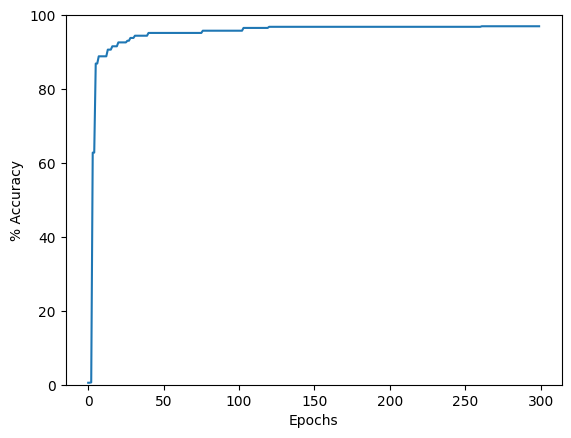

In [18]:
plt.plot(epochs,max_values_list)
plt.ylim(0,100)
plt.xlabel("Epochs")
plt.ylabel("% Accuracy")

In [19]:
max_values_list[-1]

96.98795180722891

In [20]:
model_accuracy= (tp+tn)/(tp+fp+tn+fn)
model_precision= tp/(tp+fp)
model_recall= tp/(tp+fn)
model_f= 2*model_precision*model_recall/(model_precision+model_recall)

In [21]:
print('F-Score=%.3f, Precision=%.3f, Recall=%.3f ,model_accuracy=%f' % (model_f, model_precision, model_recall, model_accuracy))

F-Score=0.861, Precision=0.793, Recall=0.943 ,model_accuracy=0.858379


In [22]:
print(tp,fp,fn,tn)

87675 22886 5325 83314
